# 1. Upload Kaggle API key and download the dataset


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zeynkash","key":"a0ac09fb1e9ab6adf43f1a9e52f50e3c"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                              title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance             Student Habits vs Academic Performance                 19512  2025-04-12 10:49:08.663000          29419        522  1.0              
adilshamim8/social-media-addiction-vs-relationships              Students' Social Media Addiction                        7851  2025-05-10 14:38:02.713000           4920         74  1.0              
orvile/health-and-sleep-relation-2024                            Health and Sleep relation                               2666  2025-05-08 12:35:19.687000           2100         39  1.0              
adils

In [ ]:
!kaggle datasets download -d gibi13/pneumonia-covid19-image-dataset

Dataset URL: https://www.kaggle.com/datasets/gibi13/pneumonia-covid19-image-dataset
License(s): CC-BY-SA-4.0
100% 1.42G/1.43G [00:12<00:00, 101MB/s]
100% 1.43G/1.43G [00:12<00:00, 127MB/s]


In [ ]:
!unzip pneumonia-covid19-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: bacterial_pneumonia/person399_bacteria_1805.jpeg  
  inflating: bacterial_pneumonia/person399_bacteria_1806.jpeg  
  inflating: bacterial_pneumonia/person39_bacteria_198.jpeg  
  inflating: bacterial_pneumonia/person39_bacteria_200.jpeg  
  inflating: bacterial_pneumonia/person3_bacteria_10.jpeg  
  inflating: bacterial_pneumonia/person3_bacteria_11.jpeg  
  inflating: bacterial_pneumonia/person3_bacteria_12.jpeg  
  inflating: bacterial_pneumonia/person3_bacteria_13.jpeg  
  inflating: bacterial_pneumonia/person400_bacteria_1807.jpeg  
  inflating: bacterial_pneumonia/person401_bacteria_1808.jpeg  
  inflating: bacterial_pneumonia/person402_bacteria_1809.jpeg  
  inflating: bacterial_pneumonia/person402_bacteria_1810.jpeg  
  inflating: bacterial_pneumonia/person402_bacteria_1811.jpeg  
  inflating: bacterial_pneumonia/person402_bacteria_1812.jpeg  
  inflating: bacterial_pneumonia/person402_bacteria_1813.jpeg  
  inflati

# 2. Prepare image dataset



In [ ]:
import os
for root, dirs, files in os.walk("/content"):
    print(root)

import os
import cv2
import numpy as np
from tqdm import tqdm

/content
/content/.config
/content/.config/logs
/content/.config/logs/2025.05.14
/content/.config/configurations
/content/.ipynb_checkpoints
/content/bacterial_pneumonia
/content/covid-19
/content/viral_pneumonia
/content/normal
/content/sample_data


In [ ]:
base_path = "/content"

In [ ]:
categories = ["normal", "bacterial_pneumonia", "viral_pneumonia", "covid-19"]

IMG_SIZE = 64
data = []

for label, category in enumerate(categories):
    path = os.path.join(base_path, category)
    print(f"Processing category: {category}")
    for img_name in tqdm(os.listdir(path)):
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append([img.flatten(), label])
        except:
            pass

X = np.array([x for x, _ in data])
y = np.array([y for _, y in data])

Processing category: normal


100%|██████████| 1443/1443 [00:23<00:00, 62.03it/s]


Processing category: bacterial_pneumonia


100%|██████████| 2727/2727 [00:09<00:00, 278.30it/s]


Processing category: viral_pneumonia


100%|██████████| 1512/1512 [00:19<00:00, 79.21it/s]


Processing category: covid-19


100%|██████████| 980/980 [00:05<00:00, 178.33it/s]


In [ ]:
print("Number of samples:", len(X))
print("Shape of each image:", X.shape[1])
print("Classes:", np.unique(y))

✅ Data prepared successfully
Number of samples: 6662
Shape of each image: 4096
Classes: [0 1 2 3]


# 3. Train/Test split


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Number of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))

Number of training samples: 5329
Number of testing samples: 1333


# 4. Import metrics and helper libs


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# SVM

## Create the model


In [ ]:
model_svm = SVC(kernel='linear')  # Try rbf as well

## Train the model


In [ ]:
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

## Predict on test data


In [ ]:
y_pred = model_svm.predict(X_test)

## Calculate accuracy


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"🔎 Model accuracy: {accuracy * 100:.2f}%")

🔎 Model accuracy: 72.24%


## Plot confusion matrix

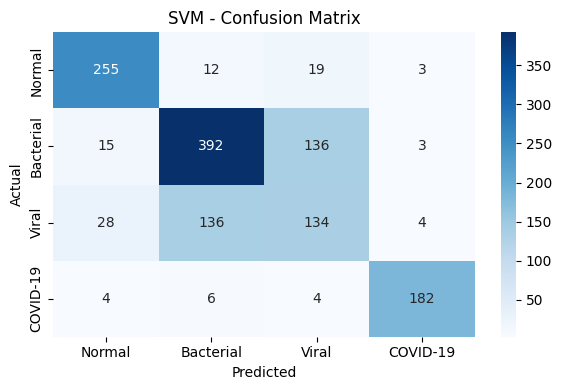

In [ ]:
os.makedirs("figures", exist_ok=True)
cm = confusion_matrix(y_test, y_pred)
labels = ["Normal", "Bacterial", "Viral", "COVID-19"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM - Confusion Matrix")
plt.tight_layout()
plt.savefig("figures/svm_confusion_matrix.png", dpi=300)  # Save the image in high quality
plt.show()

##Save the report to a text file


In [ ]:
report = classification_report(y_test, y_pred, target_names=labels)
with open("figures/svm_classification_report.txt", "w") as f:
    f.write("SVM Classification Report\n")
    f.write("="*40 + "\n")
    f.write(report)

print("✅ Performance report saved to a text file.")

✅ Performance report saved to a text file.


## save the model accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

with open("figures/svm_accuracy.txt", "w") as f:
    f.write(f"SVM Accuracy: {accuracy * 100:.2f}%\n")

print("✅ Model accuracy saved.")

✅ Model accuracy saved.


#KNN

##import the knn algo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Create the model with k=5 (modifiable)


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)

## Train the model


In [ ]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

## Predict

In [ ]:
y_pred_knn = model_knn.predict(X_test)

## Calculate accuracy

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"🎯 KNN Accuracy: {accuracy_knn * 100:.2f}%")

🎯 KNN Accuracy: 76.89%


## plot confusion matrix

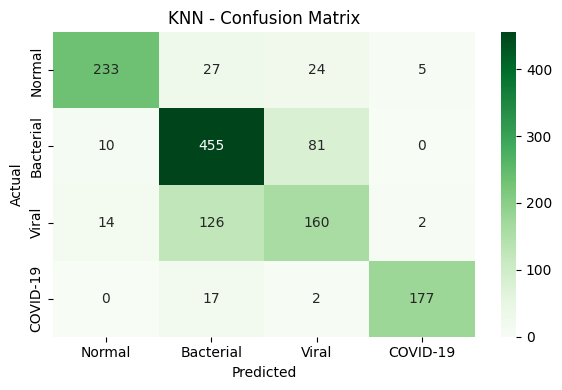

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN - Confusion Matrix")
plt.tight_layout()
plt.savefig("figures/knn_confusion_matrix.png", dpi=300)
plt.show()

## save the report to a text file

In [ ]:
report_knn = classification_report(y_test, y_pred_knn, target_names=labels)
with open("figures/knn_classification_report.txt", "w") as f:
    f.write("KNN Classification Report\n")
    f.write("="*40 + "\n")
    f.write(report_knn)

## save the model accoarcy to a text file

In [ ]:
with open("figures/knn_accuracy.txt", "w") as f:
    f.write(f"KNN Accuracy: {accuracy_knn * 100:.2f}%\n")

#RANDOM FOREST CLASSIFIER

## import the RFC algo

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## create the model

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

## Train the model

In [ ]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## predict

In [ ]:
y_pred_rf = model_rf.predict(X_test)

##calculate accuracy

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"🎯 Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

🎯 Random Forest Accuracy: 79.14%


## plot confusion matrix

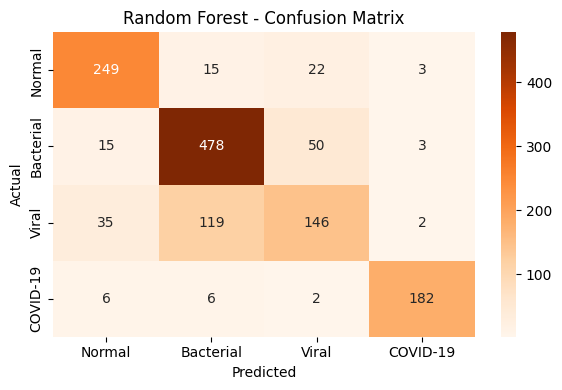

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Oranges", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.tight_layout()
plt.savefig("figures/randomforest_confusion_matrix.png", dpi=300)
plt.show()

## save the report to a text file

In [ ]:
report_rf = classification_report(y_test, y_pred_rf, target_names=labels)
with open("figures/randomforest_classification_report.txt", "w") as f:
    f.write("Random Forest Classification Report\n")
    f.write("="*40 + "\n")
    f.write(report_rf)

## save the model accuracy to a text file

In [ ]:
with open("figures/randomforest_accuracy.txt", "w") as f:
    f.write(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%\n")

# NAIVE BAYES CLASSIFIER

In [ ]:
# Naive Bayes Classifier algorithm
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Create the model
model_nb = GaussianNB()

In [ ]:
# Train the model
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict
y_pred_nb = model_nb.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"🎯 Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

🎯 Naive Bayes Accuracy: 68.94%


In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

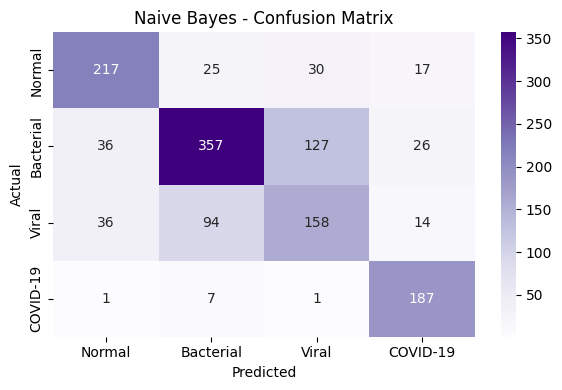

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap="Purples", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes - Confusion Matrix")
plt.tight_layout()
plt.savefig("figures/naivebayes_confusion_matrix.png", dpi=300)
plt.show()

In [ ]:
report_nb = classification_report(y_test, y_pred_nb, target_names=labels)

In [ ]:
with open("figures/naivebayes_classification_report.txt", "w") as f:
    f.write("Naive Bayes Classification Report\n")
    f.write("="*40 + "\n")
    f.write(report_nb)

In [ ]:
with open("figures/naivebayes_accuracy.txt", "w") as f:
    f.write(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%\n")

#Plot Bar Chart to compare accuracies

In [ ]:
# Model names
models = ["SVM", "KNN", "Random Forest", "Naive Bayes"]

In [ ]:
# Accuracy percentages for each model
accuracies = [
    accuracy * 100,        # SVM
    accuracy_knn * 100,    # KNN
    accuracy_rf * 100,     # Random Forest
    accuracy_nb * 100      # Naive Bayes
]

Text(0.5, 1.0, 'Model Comparison - Accuracy')

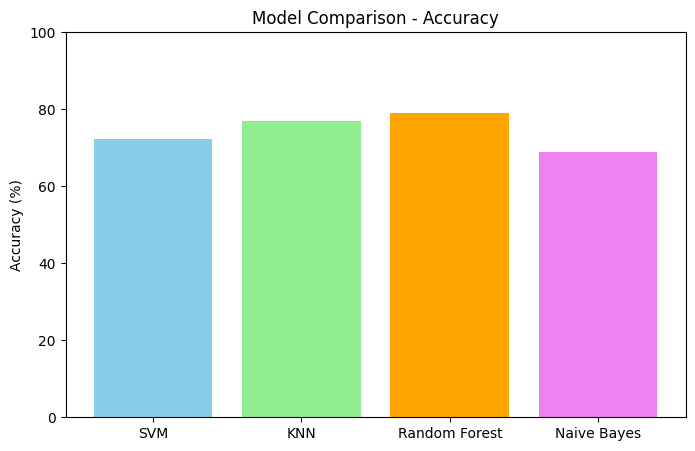

In [ ]:
# Draw the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=["skyblue", "lightgreen", "orange", "violet"])
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison - Accuracy")